<a href="https://colab.research.google.com/github/panimesh14/user-relevance-scoring-model-improved/blob/main/Jan_04_2023_tcomb_iterative_impute_normal_dist_cdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Standard Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
import scipy as sp
sp.stats.norm.pdf(0.5,loc=0.5,scale=1)

0.3989422804014327

# Data Loading

In [ ]:
details_user =pd.read_csv('user_details_college_company - Sheet2.csv');
details_user.head()

,username,booking_count,gross_earning,core_earning,profile_views,firstbooking,lastbooking,active_days,core_earning_per_day,date_joined,age_in_days,title,description,currenc,followers,company name,company tier numerical,college name,college tier numerical,industry,Industry_numerical,years of experience,# of posts/week,avg engagement per post last 30 days,title.1,user summary,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,Gender,gender_score,# of promotional posts
0,anshul0,3107,138633,138293,5813,26-12-2021,22-12-2022,360,384.147222,20-12-2021,367,Founder @Tech and Target | Helping Students in...,NaN,INR,6705.0,topmate.io,5.0,GLA University,7.0,Software Developer,9.0,5.0,1.166667,13.0,Founder@Tech and Target | Youtuber | 140k+ Sub...,I am a final year undergraduate pursuing Compu...,1.0,0.0,0.0,male,1,1.0
1,PratikShrivastava,1743,31437,31437,323,05-01-2022,24-12-2022,353,89.056657,23-12-2021,353,10+ Yrs Exp | R&D Specialist at Nokia Networks...,"Hi, This is Pratik Shrivastava here. I have 10...",INR,8619.0,OnlineStudy4U,5.0,ramaiah-institute-of-technology,6.0,Software Developer,9.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,lokesh_bagora,1624,18275,18275,652,10-01-2022,09-10-2022,271,67.435424,10-01-2022,271,"Mock Interview , Career Guidance , Placement P...","Hello, everyone, I am Lokesh Bagora from Indor...",INR,NaN,Self,5.0,Shivajirao Kadam Institute of Technology and ...,6.0,Software Developer,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,deepika_rajagopal,1585,1782,1782,2800,31-01-2022,31-03-2022,59,30.203390,31-01-2022,59,IT proffesional | Help aspiring fresher's in c...,Deepika Here !\nI am the content creator of On...,INR,NaN,OnlineStudy4U,5.0,NaN,5.0,Software Developer,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,shreya_gupta,862,9050,9050,3000,01-02-2022,26-03-2022,52,174.038462,23-02-2022,52,"Mock Interview(All MNCs), Career Guidance, Pla...","Hello, I am Shreya Gupta pursuing my final yea...",INR,1363.0,Ernst & Young Global Consulting Services,8.0,Noida Institute of Engineering & Technology,7.0,User Summary:\nI am a recent college graduate ...,6.0,2.0,0.000000,0.0,Analyst in Ernst and Young,0,0.0,0.0,0.0,female,0,0.0


In [ ]:
details_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   username                              2478 non-null   object 
 1   booking_count                         2478 non-null   int64  
 2   gross_earning                         2478 non-null   int64  
 3   core_earning                          2478 non-null   int64  
 4   profile_views                         2478 non-null   int64  
 5   firstbooking                          2478 non-null   object 
 6   lastbooking                           2478 non-null   object 
 7   active_days                           2478 non-null   int64  
 8   core_earning_per_day                  2478 non-null   float64
 9   date_joined                           2478 non-null   object 
 10  age_in_days                           2478 non-null   int64  
 11  title            

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
details_user.head(2)

,username,booking_count,gross_earning,core_earning,profile_views,firstbooking,lastbooking,active_days,core_earning_per_day,date_joined,age_in_days,title,description,currenc,followers,company name,company tier numerical,college name,college tier numerical,industry,Industry_numerical,years of experience,# of posts/week,avg engagement per post last 30 days,title.1,user summary,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,Gender,gender_score,# of promotional posts
0,anshul0,3107,138633,138293,5813,26-12-2021,22-12-2022,360,384.147222,20-12-2021,367,Founder @Tech and Target | Helping Students in...,NaN,INR,6705.0,topmate.io,5.0,GLA University,7.0,Software Developer,9.0,5.0,1.166667,13.0,Founder@Tech and Target | Youtuber | 140k+ Sub...,I am a final year undergraduate pursuing Compu...,1.0,0.0,0.0,male,1,1.0
1,PratikShrivastava,1743,31437,31437,323,05-01-2022,24-12-2022,353,89.056657,23-12-2021,353,10+ Yrs Exp | R&D Specialist at Nokia Networks...,"Hi, This is Pratik Shrivastava here. I have 10...",INR,8619.0,OnlineStudy4U,5.0,ramaiah-institute-of-technology,6.0,Software Developer,9.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


### Data Filtering 

In [ ]:
cols_det=['booking_count', 'age_in_days','core_earning','active_days', 'followers', 'company tier numerical', 'college tier numerical', 'years of experience', '# of posts/week', 'avg engagement per post last 30 days', '# of Posts last 30 days', '# of Comments last 30 days', '# of Reactions last 30 days', 'gender_score','# of promotional posts']
details_profile_int=details_user[cols_det]

In [ ]:
details_profile_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   booking_count                         2478 non-null   int64  
 1   age_in_days                           2478 non-null   int64  
 2   core_earning                          2478 non-null   int64  
 3   active_days                           2478 non-null   int64  
 4   followers                             1818 non-null   float64
 5   company tier numerical                1851 non-null   float64
 6   college tier numerical                1916 non-null   float64
 7   years of experience                   1786 non-null   float64
 8   # of posts/week                       1779 non-null   float64
 9   avg engagement per post last 30 days  1779 non-null   float64
 10  # of Posts last 30 days               1779 non-null   float64
 11  # of Comments las

details_profile_int.drop(['Industry_numerical'],axis=1,inplace=True)

In [ ]:
details_profile_int.columns

Index(['booking_count', 'age_in_days', 'core_earning', 'active_days',
       'followers', 'company tier numerical', 'college tier numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts'],
      dtype='object')

# Exploratory Data Analysis

In [ ]:
details_profile_int['gender_score'].head(7)

0    1
1    1
2    1
3    0
4    0
5    0
6    1
Name: gender_score, dtype: int64

In [ ]:
details_profile_int.isna().nunique()
#followers, company tier numerical, college tier numerical, years of experience, # of posts/week, avg engagement per post last 30 days, # of posts last 30 days, # of Comments last 30 days, # of Reactions last 30 days, Gender, # of promotional posts

booking_count                           1
age_in_days                             1
core_earning                            1
active_days                             1
followers                               2
company tier numerical                  2
college tier numerical                  2
years of experience                     2
# of posts/week                         2
avg engagement per post last 30 days    2
# of Posts last 30 days                 2
# of Comments last 30 days              2
# of Reactions last 30 days             2
gender_score                            1
# of promotional posts                  2
dtype: int64

In [ ]:
details_profile_int.isnull().sum()

booking_count                             0
age_in_days                               0
core_earning                              0
active_days                               0
followers                               660
company tier numerical                  627
college tier numerical                  562
years of experience                     692
# of posts/week                         699
avg engagement per post last 30 days    699
# of Posts last 30 days                 699
# of Comments last 30 days              699
# of Reactions last 30 days             699
gender_score                              0
# of promotional posts                  699
dtype: int64

In [ ]:
len(details_profile_int)

2478

In [ ]:
100*details_profile_int.isnull().sum()/len(details_profile_int)

booking_count                            0.000000
age_in_days                              0.000000
core_earning                             0.000000
active_days                              0.000000
followers                               26.634383
company tier numerical                  25.302663
college tier numerical                  22.679580
years of experience                     27.925747
# of posts/week                         28.208232
avg engagement per post last 30 days    28.208232
# of Posts last 30 days                 28.208232
# of Comments last 30 days              28.208232
# of Reactions last 30 days             28.208232
gender_score                             0.000000
# of promotional posts                  28.208232
dtype: float64

##Dropping Nans

In [ ]:

details_profile_int_dr = details_profile_int.dropna()
len(details_profile_int_dr)

1714

#Iterative Imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iterpute = IterativeImputer()
details_profile_int_sim = iterpute.fit_transform(details_profile_int)
data_ret = len(details_profile_int_sim)/len(details_profile_int)
data_loss = 1-data_ret
data_loss

0.0

In [ ]:
details_profile_int_dr = pd.DataFrame(details_profile_int_sim,columns=details_profile_int.columns)
details_profile_int_dr.isnull().sum()

booking_count                           0
age_in_days                             0
core_earning                            0
active_days                             0
followers                               0
company tier numerical                  0
college tier numerical                  0
years of experience                     0
# of posts/week                         0
avg engagement per post last 30 days    0
# of Posts last 30 days                 0
# of Comments last 30 days              0
# of Reactions last 30 days             0
gender_score                            0
# of promotional posts                  0
dtype: int64

In [ ]:
data_ret = len(details_profile_int_dr)/len(details_profile_int)
data_loss = 1-data_ret
data_loss

0.0

In [ ]:
# def gen_to_bin(x):
#     if(x=='male'):
#         return 0
#     else:
#         return 1

# details_profile_int_dr['Gender'] = details_profile_int_dr['Gender'].apply(gen_to_bin)
# details_profile_int_dr['Gender']

In [ ]:

# details_profile_int_dr['t1']=(details_profile_int_dr['core_earning']/(details_profile_int_dr['active_days']+1))
# details_profile_int_dr['t2']=(details_profile_int_dr['core_earning']/(details_profile_int_dr['booking_count']+1))
# details_profile_int_dr.info() 

In [ ]:
# details_profile_int_dr['t1'].describe(percentiles=[0.6,0.7,0.8,0.9,0.99])

In [ ]:
# details_profile_int_dr['t2'].describe(percentiles=[0.6,0.7,0.8,0.9,0.99])

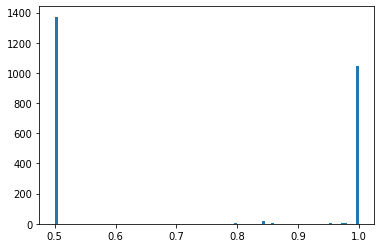

In [ ]:
details_profile_int_dr['target_score']=(details_profile_int_dr['core_earning']/(details_profile_int_dr['active_days']+1))+(details_profile_int_dr['core_earning']/(details_profile_int_dr['booking_count']+1))
#details_profile_int_dr['target_score2']=

details_profile_int_dr['target_score'] = sp.stats.norm.cdf(details_profile_int_dr['target_score'],loc=0,scale=1)
details_profile_int_dr['target_score'].hist(bins=100)
#details_profile_int_dr[details_profile_int_dr['target_score']<0.9]['core_earning'].plot()#hist(bins=100)
plt.grid()

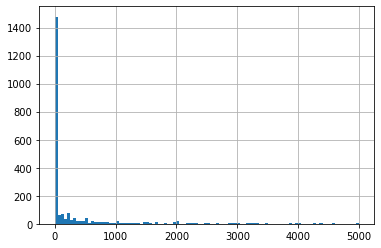

In [ ]:
details_profile_int_dr[details_profile_int_dr['core_earning']<5000]['core_earning'].hist(bins=100)

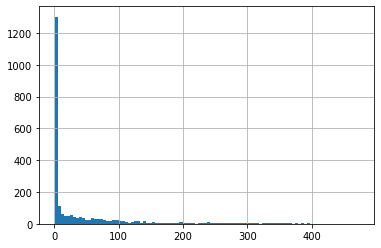

In [ ]:
details_profile_int_dr['active_days'].hist(bins=100)

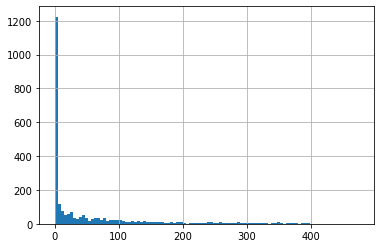

In [ ]:
details_profile_int_dr['age_in_days'].hist(bins=100)

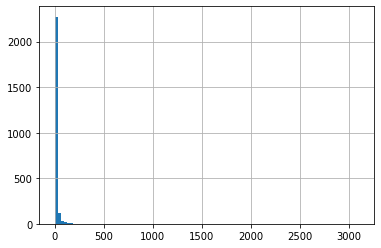

In [ ]:
details_profile_int_dr['booking_count'].hist(bins=100)

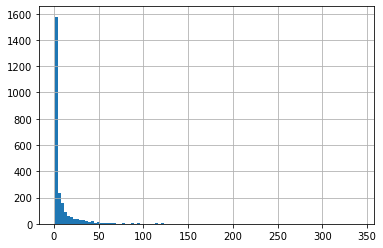

In [ ]:
details_profile_int_dr[details_profile_int_dr['booking_count']<400]['booking_count'].hist(bins=100)

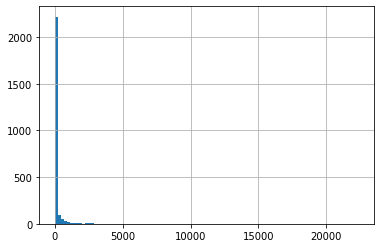

In [ ]:
details_user['profile_views'].hist(bins=100)

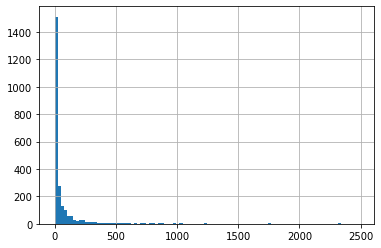

In [ ]:
details_user[details_user['profile_views']<2500]['profile_views'].hist(bins=100)

In [ ]:
details = details_profile_int_dr
details.head()

,booking_count,age_in_days,core_earning,active_days,followers,company tier numerical,college tier numerical,years of experience,# of posts/week,avg engagement per post last 30 days,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,gender_score,# of promotional posts,target_score
0,3107.0,367.0,138293.0,360.0,6705.000000,5.0,7.0,5.0,1.166667,13.000000,1.000000,0.000000,0.000000,1.0,1.000000,1.0
1,1743.0,353.0,31437.0,353.0,8619.000000,5.0,6.0,12.0,2.836936,155.766060,4.914843,1.190502,2.629054,1.0,3.612194,1.0
2,1624.0,271.0,18275.0,271.0,20619.957204,5.0,6.0,4.0,2.777625,185.883403,4.293077,1.250093,2.667245,1.0,3.415630,1.0
3,1585.0,59.0,1782.0,59.0,8701.845218,5.0,5.0,3.0,2.401853,80.361750,3.076529,0.475918,1.471971,0.0,2.910151,1.0
4,862.0,52.0,9050.0,52.0,1363.000000,8.0,7.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0


In [ ]:
details_profile_int_dr.describe()

,booking_count,age_in_days,core_earning,active_days,followers,company tier numerical,college tier numerical,years of experience,# of posts/week,avg engagement per post last 30 days,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,gender_score,# of promotional posts,target_score
count,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000,2478.000000
mean,14.823245,50.011299,2627.464891,48.302260,9617.237715,8.166190,7.908506,5.051163,1.202675,87.780304,3.015248,1.169857,1.037351,0.804681,1.019096,0.718867
std,91.945523,85.964183,16697.330980,84.562023,21608.838633,1.129338,0.973191,3.486106,1.985341,318.326234,5.466908,2.345759,2.476011,0.396526,2.247521,0.246194
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,1.000000,0.000000,0.000000,1.000000,2202.000000,8.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000
50%,2.000000,5.000000,0.000000,3.000000,6951.258954,8.000000,7.959158,5.017584,0.875000,38.250000,2.000000,0.894590,0.000000,1.000000,0.679582,0.500000
75%,9.000000,64.000000,499.750000,59.000000,9045.637449,8.315324,8.000000,5.212004,1.193657,68.869590,3.030426,1.014109,1.000000,1.000000,1.000000,1.000000
max,3107.000000,475.000000,503395.000000,473.000000,504239.000000,10.000000,10.000000,35.000000,28.000000,9876.000000,65.000000,36.000000,35.000000,1.000000,35.000000,1.000000


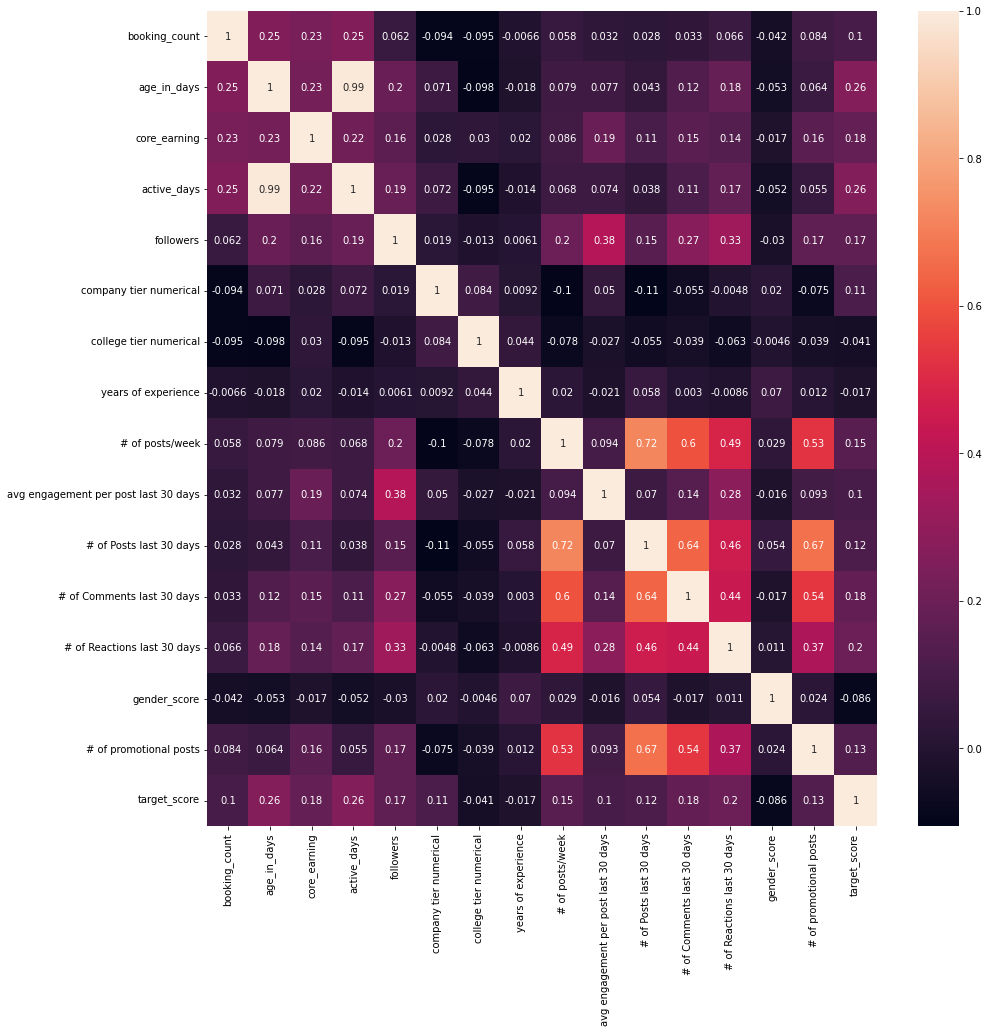

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(details_profile_int_dr.corr(),annot=True)

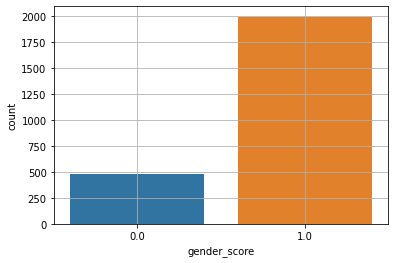

In [ ]:
sns.countplot(x='gender_score',data=details_profile_int_dr)
plt.grid()
#Male:Female~4:1
#Highlights Gender Imbalance in the dataset

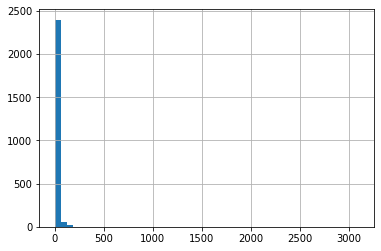

In [ ]:
#sns.displot(x='booking_count',data=details_profile_int_dr)
plt.hist(details_profile_int_dr['booking_count'],bins=50)
plt.grid()


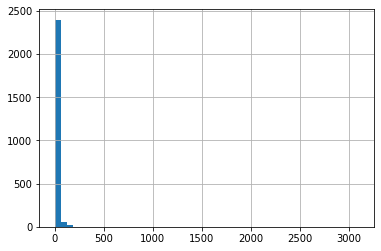

In [ ]:
#sns.displot(x='booking_count',data=details_profile_int_dr)
plt.hist(details_profile_int_dr['booking_count'],bins=50)
plt.grid()


In [ ]:
details_profile_int_dr['followers'].head(10)

0      6705.000000
1      8619.000000
2     20619.957204
3      8701.845218
4      1363.000000
5    106015.000000
6     18745.000000
7      2552.000000
8      3369.000000
9        52.000000
Name: followers, dtype: float64

In [ ]:
details_profile_int_dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   booking_count                         2478 non-null   float64
 1   age_in_days                           2478 non-null   float64
 2   core_earning                          2478 non-null   float64
 3   active_days                           2478 non-null   float64
 4   followers                             2478 non-null   float64
 5   company tier numerical                2478 non-null   float64
 6   college tier numerical                2478 non-null   float64
 7   years of experience                   2478 non-null   float64
 8   # of posts/week                       2478 non-null   float64
 9   avg engagement per post last 30 days  2478 non-null   float64
 10  # of Posts last 30 days               2478 non-null   float64
 11  # of Comments las

In [ ]:
#details_profile_int_dr['followers'] = details_profile_int_dr['followers'].astype('int64')
#details_profile_int_dr['company tier numerical'] = details_profile_int_dr['company tier numerical'].astype('int64')
#details_profile_int_dr['college tier numerical'] = details_profile_int_dr['college tier numerical'].astype('int64')
#details_profile_int_dr['company tier numerical']=details_profile_int_dr['company_tier_numerical'].astype('int64')
details_profile_int_dr['company tier numerical'].dtypes

dtype('float64')

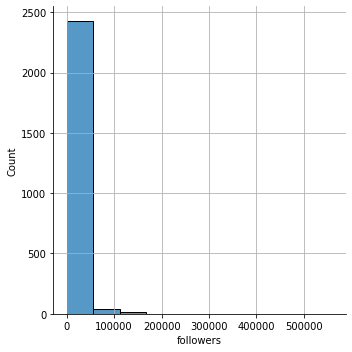

In [ ]:
#plt.hist(details_profile_int_dr['followers'],bins=10)
sns.displot(details_profile_int_dr,x='followers',binwidth=56000,bins=10)
plt.grid()

In [ ]:
details_profile_int_dr.columns

Index(['booking_count', 'age_in_days', 'core_earning', 'active_days',
       'followers', 'company tier numerical', 'college tier numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts', 'target_score'],
      dtype='object')

sns.countplot(x='company tier numerical',data=details_profile_int_dr,binwidth=56000,bins=10)
plt.grid()

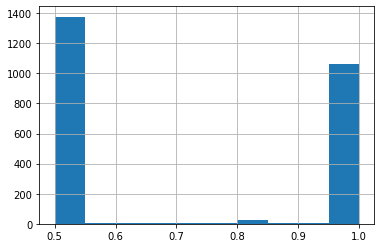

In [ ]:
details_profile_int_dr['target_score'].hist()

###here we have passed the target through a function to range bound the target
ideally if i combine this with username i should atleast be able to see if categorisation of 0/1 is correct for target

In [ ]:
details_profile_int_dr.columns

Index(['booking_count', 'age_in_days', 'core_earning', 'active_days',
       'followers', 'company tier numerical', 'college tier numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts', 'target_score'],
      dtype='object')

In [ ]:
details_profile_int_dr.to_csv('ranged_target.csv')

In [ ]:
# details_user = details_user.dropna()
# #len(details_profile_int_dr)

In [ ]:

# t = pd.DataFrame(details_profile_int_dr['target_score'],columns=['ranged_target'])
# rt = pd.concat([details_user,t],axis=1,join='inner')
# rt.to_csv('ranged_target.csv')

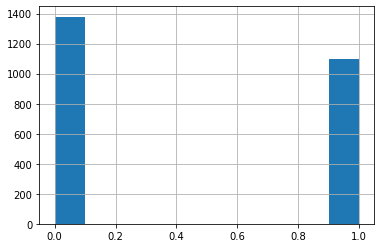

In [ ]:
def targ_to_bin(x):
    t = 0.85;
    if(x<t):
        return 0;
    else:
        return 1;

# details_profile_int_dr[details_profile_int_dr['target_score']>=0.4]['target_score']=1
# details_profile_int_dr[details_profile_int_dr['target_score']<0.4]['target_score']=0
details_profile_int_dr['target_score'] = details_profile_int_dr['target_score'].apply(targ_to_bin)
details_profile_int_dr['target_score'].hist()

In [ ]:
#sns.pairplot(details_profile_int_dr, hue='target_score')

In [ ]:
#details_profile_int_dr.to_csv('Actual.csv',index=True)
details_profile_int_dr.columns

Index(['booking_count', 'age_in_days', 'core_earning', 'active_days',
       'followers', 'company tier numerical', 'college tier numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts', 'target_score'],
      dtype='object')

In [ ]:
details_profile_int_dr=details_profile_int_dr[['followers', 'company tier numerical', 'college tier numerical','years of experience', '# of posts/week','avg engagement per post last 30 days', '# of Posts last 30 days','# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts','target_score', ]]
details_profile_int_dr   

,followers,company tier numerical,college tier numerical,years of experience,# of posts/week,avg engagement per post last 30 days,# of Posts last 30 days,# of Comments last 30 days,# of Reactions last 30 days,gender_score,# of promotional posts,target_score
0,6705.000000,5.000000,7.000000,5.000000,1.166667,13.000000,1.000000,0.000000,0.000000,1.0,1.000000,1
1,8619.000000,5.000000,6.000000,12.000000,2.836936,155.766060,4.914843,1.190502,2.629054,1.0,3.612194,1
2,20619.957204,5.000000,6.000000,4.000000,2.777625,185.883403,4.293077,1.250093,2.667245,1.0,3.415630,1
3,8701.845218,5.000000,5.000000,3.000000,2.401853,80.361750,3.076529,0.475918,1.471971,0.0,2.910151,1
4,1363.000000,8.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2473,6969.093359,8.118411,7.959558,5.063251,1.137857,67.251734,3.020917,1.000935,0.776265,1.0,0.958230,1
2474,6969.093359,8.118411,7.959558,5.063251,1.137857,67.251734,3.020917,1.000935,0.776265,1.0,0.958230,1
2475,6969.093359,8.118411,7.959558,5.063251,1.137857,67.251734,3.020917,1.000935,0.776265,1.0,0.958230,1
2476,6969.093359,8.118411,7.959558,5.063251,1.137857,67.251734,3.020917,1.000935,0.776265,1.0,0.958230,1


In [ ]:
# #sns.displot(x='booking_count',data=details_profile_int_dr)
# plt.hist(details_profile_int_dr['booking_count'],bins=50)
# plt.grid()


In [ ]:
details_profile_int_dr.columns

Index(['followers', 'company tier numerical', 'college tier numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts', 'target_score'],
      dtype='object')

In [ ]:
details_profile_int_dr['followers'] = details_profile_int_dr['followers'].astype('int64')

<ipython-input-80-2857bd4240f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  details_profile_int_dr['followers'] = details_profile_int_dr['followers'].astype('int64')


In [ ]:
#plt.figure(figsize=(12,12))
#i = 1;
#for ind in details_profile_int_dr.columns:
#    plt.subplot(4,4,i)
#    sns.scatterplot(x=ind,y='target_score',data=details_profile_int_dr)
#    plt.grid()
#    i=i+1;

# Feature Elimination

In [ ]:
X = details_profile_int_dr.drop(['target_score'],axis=1)
y = details_profile_int_dr['target_score']

# Train_Test_Split

In [ ]:
#!python.exe -m pip install --upgrade pip
#!pip install sklearn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
Xtr,Xte,ytrain,ytest=train_test_split(X,y,test_size=0.3)

#Data Scaling and Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain= scaler.fit_transform(Xtr)
Xtest = scaler.transform(Xte)

# Model Building 

In [ ]:
#Importing Models for Majority Vote
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
logreg=LogisticRegression(penalty="l2")
MultiNB=MultinomialNB()
GaussNB=GaussianNB()
BernNB=BernoulliNB()
svc_clf=LinearSVC()
rfc=RandomForestClassifier(n_estimators=100,max_depth=1000)

In [ ]:
Xtr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 2184 to 1110
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   followers                             1734 non-null   int64  
 1   company tier numerical                1734 non-null   float64
 2   college tier numerical                1734 non-null   float64
 3   years of experience                   1734 non-null   float64
 4   # of posts/week                       1734 non-null   float64
 5   avg engagement per post last 30 days  1734 non-null   float64
 6   # of Posts last 30 days               1734 non-null   float64
 7   # of Comments last 30 days            1734 non-null   float64
 8   # of Reactions last 30 days           1734 non-null   float64
 9   gender_score                          1734 non-null   float64
 10  # of promotional posts                1734 non-null   float64
dtypes: float64(10)

# Model Fitting

In [ ]:
details_profile_int_dr.isnull().sum()

followers                               0
company tier numerical                  0
college tier numerical                  0
years of experience                     0
# of posts/week                         0
avg engagement per post last 30 days    0
# of Posts last 30 days                 0
# of Comments last 30 days              0
# of Reactions last 30 days             0
gender_score                            0
# of promotional posts                  0
target_score                            0
dtype: int64

In [ ]:
details_profile_int_dr.columns

Index(['followers', 'company tier numerical', 'college tier numerical',
       'years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts', 'target_score'],
      dtype='object')

In [ ]:
logreg.fit(Xtrain,ytrain)
yhat_logreg=logreg.predict(Xtest)

ValueError: ignored

In [ ]:
MultiNB.fit(Xtrain,ytrain)
yhat_MultiNB=MultiNB.predict(Xtest)

In [ ]:
GaussNB.fit(Xtrain,ytrain)
yhat_GaussNB=GaussNB.predict(Xtest)

In [ ]:
BernNB.fit(Xtrain,ytrain)
yhat_BernNB=BernNB.predict(Xtest)

In [ ]:
svc_clf.fit(Xtrain,ytrain)
yhat_svc=svc_clf.predict(Xtest)

In [ ]:
rfc.fit(Xtrain,ytrain)
yhat_rfc=rfc.predict(Xtest)

# Model Evaluation and Testing

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Logistic Regression 
print("Logistic Regression")
print(classification_report(ytest,yhat_logreg))

##Multinomial Naive Bayes
print("Multinomial Naive Bayes")
print(classification_report(ytest,yhat_MultiNB))

#Gaussian Naive Bayes
print("Gaussian Naive Bayes")
print(classification_report(ytest,yhat_GaussNB))
#Gausaian Naive Bayes Model displays poor recall on the data and results in only ~50-55% accuracy overall.
#f1 score suggests overall performance

#Bernoulli Naive Bayes
print("Bernoulli Naive Bayes")
print(classification_report(ytest,yhat_BernNB))
#Despite simplicity of Bernoulli trials, it shows a good performance overall

#Support Vector Machine
print("Support Vector Machine")
print(classification_report(ytest,yhat_svc))

#Random Forest Classifier
print("Random Forest Classifier")
print(classification_report(ytest,yhat_rfc))

# Ensemble Model- Majority Voting Model

In [ ]:
#Majority Vote Class
from scipy.stats import mode
class MajorityVote:
    def __init__(self,*classifiers):
        self.classifier=classifiers;

    def predict(self,sample,confidence=False):
        vote=[];
        for clf in self.classifier:
            plabel=clf.predict(sample)
            vote.append(plabel)
        if(confidence):
           maj_vote_count=mode(vote)[1];            
           conf=(maj_vote_count/len(vote))*100;
           return mode(vote)[0], conf        
        else:
            return mode(vote)[0]
vote_combined_clf=MajorityVote(logreg,MultiNB,BernNB,svc_clf,rfc);

In [ ]:
yhat_mvote= (vote_combined_clf.predict(Xtest)).T
print(yhat_mvote[5:10])

In [ ]:
print(classification_report(ytest,yhat_mvote))

In [ ]:
new_file='test_v2.csv';
details_user_t=pd.read_csv(new_file);
#det_cols=['booking_count', 'age_in_days','core_earning','active_days', 'followers', 'company tier numerical', 'college tier numerical', 'years of experience', '# of posts/week', 'avg engagement per post last 30 days', '# of Posts last 30 days', '# of Comments last 30 days', '# of Reactions last 30 days', 'gender_score','# of promotional posts']
#cols_det=['followers', 'years of experience', '# of posts/week', 'avg engagement per post last 30 days', '# of Posts last 30 days', '# of Comments last 30 days', '# of Reactions last 30 days']
cols_det=['followers', 'company tier numerical', 'college tier numerical','years of experience', '# of posts/week',
       'avg engagement per post last 30 days', '# of Posts last 30 days',
       '# of Comments last 30 days', '# of Reactions last 30 days',
       'gender_score', '# of promotional posts']
details_profile_int_dr_t=details_user_t[cols_det]
details_profile_int_dr_t.dropna(inplace=True)
#pd=details_user[det_cols]#profile details
X = details_profile_int_dr_t
X_scaled = scaler.transform(X)
#y = details_profile_int_dr_t['target_score']
y_pred = vote_combined_clf.predict(X_scaled)
y = pd.DataFrame(y_pred.T,columns=['Estimator'])
df = pd.concat([details_user_t,y],axis=1,join='inner')
df.to_csv('tcomb_iterative_impute_normal_dist_cdf.csv')

In [ ]:
pwd